# Regression: Car price Prediction
***

[I. Prerequisite](#prerequisite)

[II. Import Libraries and set required parameters](#library)

[III. Data Sourcing](#sourcing)

[IV. Data Preprocessing](#preprocessing)

[V. Exploratory Data Analysis](#eda)

[VI. Convert Categorical Variables to Continuos](#cat)

[VII. Feature Scaling](#scaling)

[VII. Feature Selection](#feature)

[VIII. Bivariate/Multivariate Analysis](#bivariate)

[IX. Bivariate/Multivariate Analysis with Probability of Charged off](#bivariate_prob)

[X. Conclusion](#Conclusion)

<a id='prerequisite'></a>

## I. Prerequisite

1. Place 'CarPrice_Assignment.csv' input file at your current working directory before running this code.

2. Please make sure that you have following python libraries imported/installed at your system:

    * numpy version	: 1.12.1 or higher
    * pandas version	: 0.20.3 or higher
    * seaborn version	: 0.8.0 or higher

<a id='library'></a>

## II. Import Libraries and set required parameters

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# train-test split
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.3f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

<a id='sourcing'></a>

## III. Data Sourcing

In [364]:
car = pd.read_csv('CarPrice_Assignment.csv')
print('Rows & Columns ::',car.shape)
car.head()

Rows & Columns :: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,17450.000


<a id='preprocessing'></a>

## IV. Data Preprocessing

In [365]:
# check if there are any null values
car.isnull().sum().sum()

0

In [366]:
# check if there are any negative values(in numeric columns)
numeric_columns = car.select_dtypes(include=['number'])
numeric_columns.columns[(numeric_columns < 0).any()]

Index(['symboling'], dtype='object')

In [367]:
# As per the problem statement variable name 'CarName'  comprised of two parts:
# first word is the name of 'car company' and the second is the 'car model'.
car['company'],car['model'] = car['CarName'].str.split(' ', 1).str

In [368]:
car[['CarName','company']].sample(4)

,CarName,company
195,volvo 144ea,volvo
203,volvo 246,volvo
20,chevrolet vega 2300,chevrolet
18,chevrolet impala,chevrolet


In [369]:
# drop CarName column now
car.drop(labels=['CarName','model'],axis=1, inplace=True)

### data quality issues

In [370]:
# data cleaning in company column
car.company.unique()
# mazda is mis-spelled as maxda
# toyota is mis-spelled as toyouta
# porsche is mis-spelled as porcshce
# volkswagen is mis-spelled as vokswagen
# volkswagen in short form written as vw
# Nissan & nissan considered as two differnt company

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [371]:
car['company'] = car['company'].str.lower()
car['company'] = car.loc[:, 'company'].replace(['maxda', 'toyouta', 'porcshce','vokswagen','vw'], \
                              ['mazda', 'toyota', 'porsche','volkswagen','volkswagen'])

In [372]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<a id='eda'></a>

## V. Exploratory Data Analysis

### Univariate Analysis

##### Car price Distribution

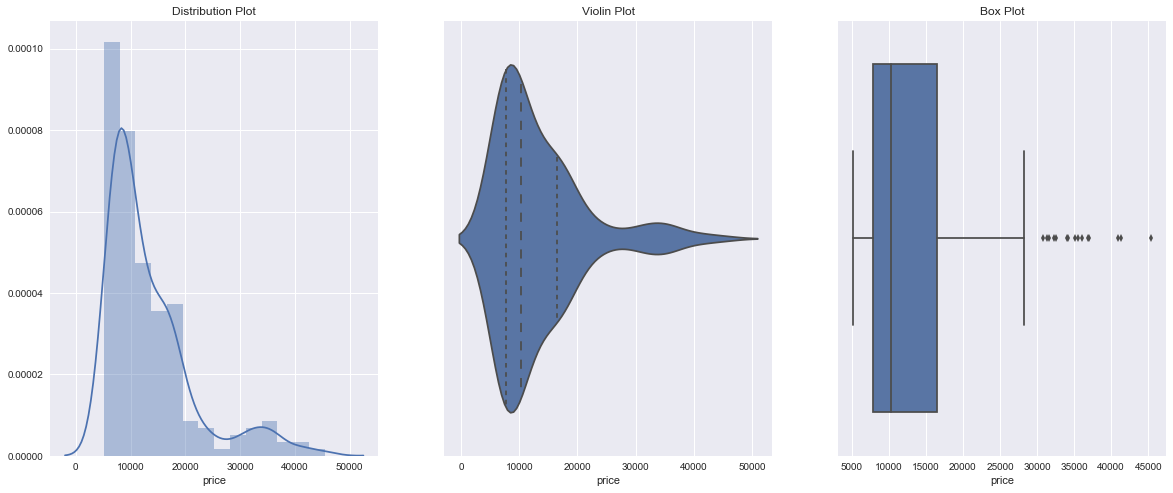

In [373]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
sns.set(style="darkgrid")
ax[0].set_title("Distribution Plot")
sns.distplot(car['price'],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(car['price'],ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(car['price'],ax=ax[2])
plt.show()

<font color='blue'><b>Insights</b>: Most of the car prices are distributed between 5000 to 15000 USD.</font> 

##### Pie Chart of different categorical variables.

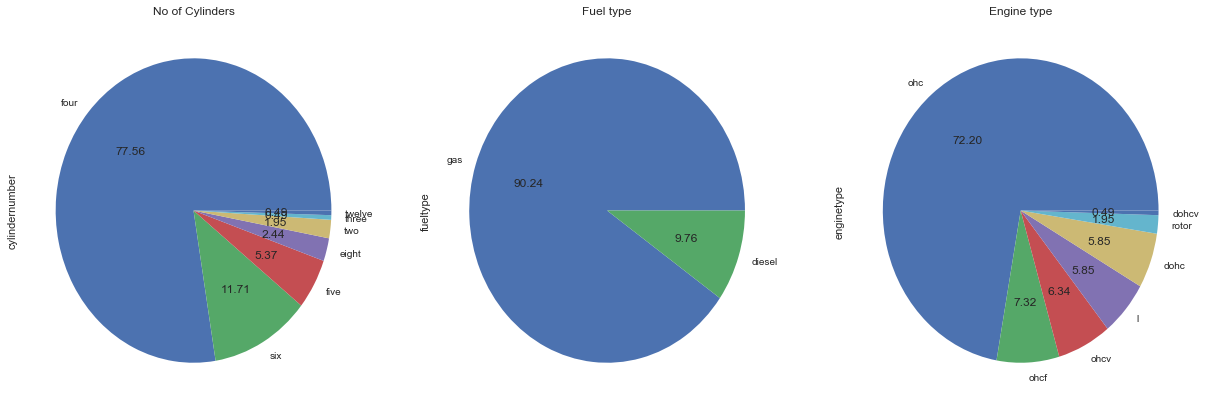

In [374]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(21,7))
car['cylindernumber'].value_counts().plot.pie(autopct='%.2f',ax=ax[0])
ax[0].set_title("No of Cylinders")
car['fueltype'].value_counts().plot.pie(autopct='%.2f',ax=ax[1])
ax[1].set_title("Fuel type")
car['enginetype'].value_counts().plot.pie(autopct='%.2f',ax=ax[2])
ax[2].set_title("Engine type")
plt.show()

<font color='blue'><b>Insights::</b></font> 
1. __77%__ of the cars have __four__ cylinders.
2. __90%__ of the cars have __gas__ as a fuel type.
3. __72%__ of the cars have __ohc__ engine type.

##### Heatmap :: Correlation between continuos variables.

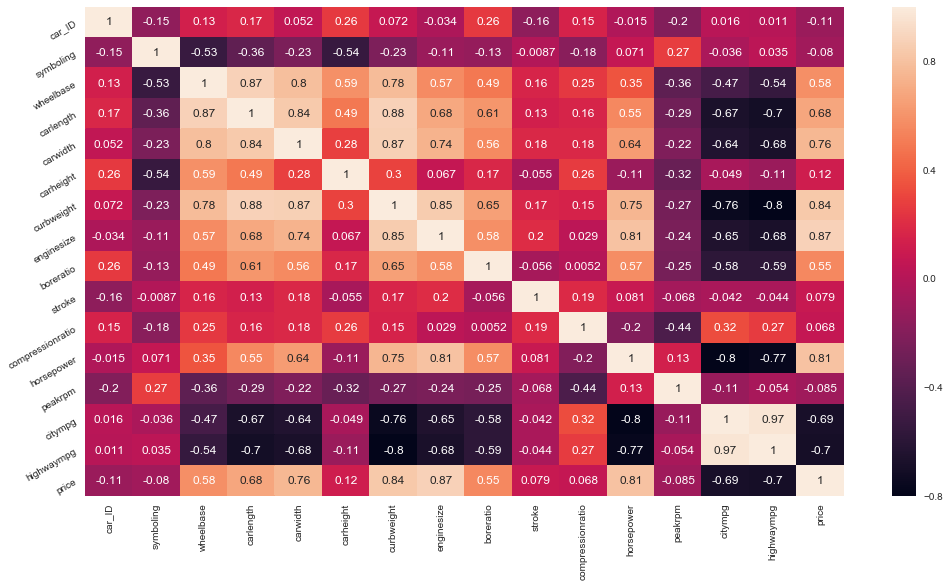

In [375]:
corr = car.corr()
plt.figure(figsize=(17,9))
ax = sns.heatmap(corr, annot=True)
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### Insights:
1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with car length & car width.
3. Wheel base is highly correlated with car length & car width.

In [376]:
#car.select_dtypes(exclude=['number']).head()
# Alternatively we can use the below statement as well to get the categorical columns
#car.select_dtypes(include=['object']).head()

In [377]:
#derived metrics


In [378]:
car.sample(5)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
128,129,3,gas,std,two,convertible,rwd,rear,89.500,168.900,65.000,51.600,2800,ohcf,six,194,mpfi,3.740,2.900,9.500,207,5900,17,25,37028.000,porsche
93,94,1,gas,std,four,wagon,fwd,front,94.500,170.200,63.800,53.500,2024,ohc,four,97,2bbl,3.150,3.290,9.400,69,5200,31,37,7349.000,nissan
99,100,0,gas,std,four,hatchback,fwd,front,97.200,173.400,65.200,54.700,2324,ohc,four,120,2bbl,3.330,3.470,8.500,97,5200,27,34,8949.000,nissan
176,177,-1,gas,std,four,sedan,fwd,front,102.400,175.600,66.500,54.900,2414,ohc,four,122,mpfi,3.310,3.540,8.700,92,4200,27,32,10898.000,toyota
77,78,2,gas,std,two,hatchback,fwd,front,93.700,157.300,64.400,50.800,1944,ohc,four,92,2bbl,2.970,3.230,9.400,68,5500,31,38,6189.000,mitsubishi


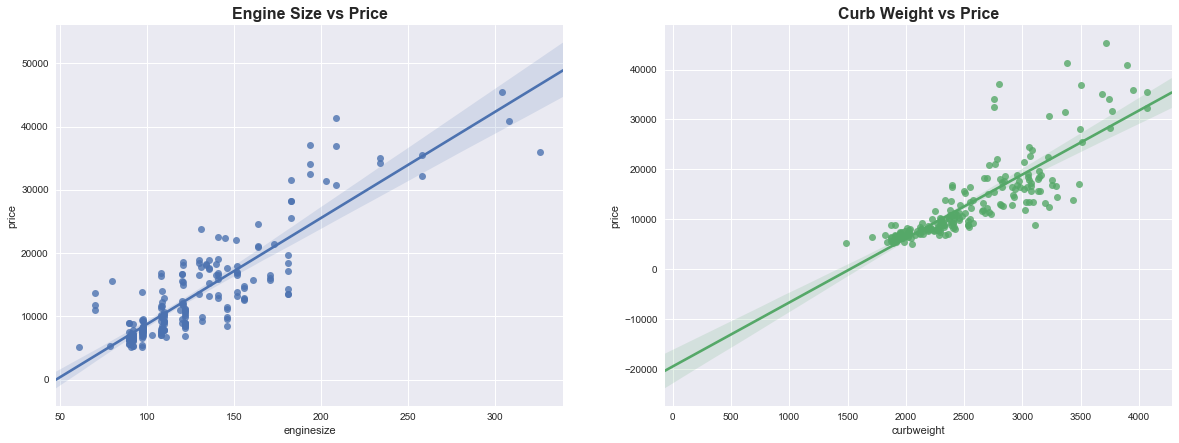

In [379]:
fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,7))
ax[0].set_title('Engine Size vs Price',fontsize=16,weight="bold")
sns.regplot(x='enginesize',y='price', data =car,ax=ax[0])
ax[1].set_title("Curb Weight vs Price",fontsize=16,weight="bold")
sns.regplot(x='curbweight',y='price', data =car,ax=ax[1])
plt.show()

### Bivariate/Multivariate Analysis

In [380]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

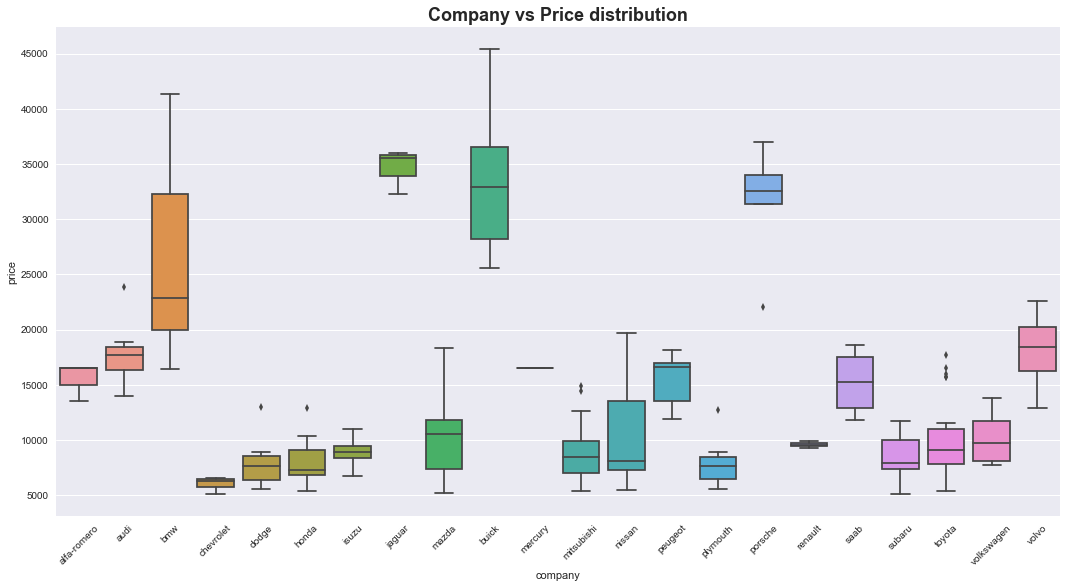

In [381]:
# Price distribution of the cars company-wise
plt.figure(figsize=(18,9))
ax = sns.boxplot(x='company',y='price',data=car)
ax.set_title('Company vs Price distribution',fontsize=18,weight="bold")
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

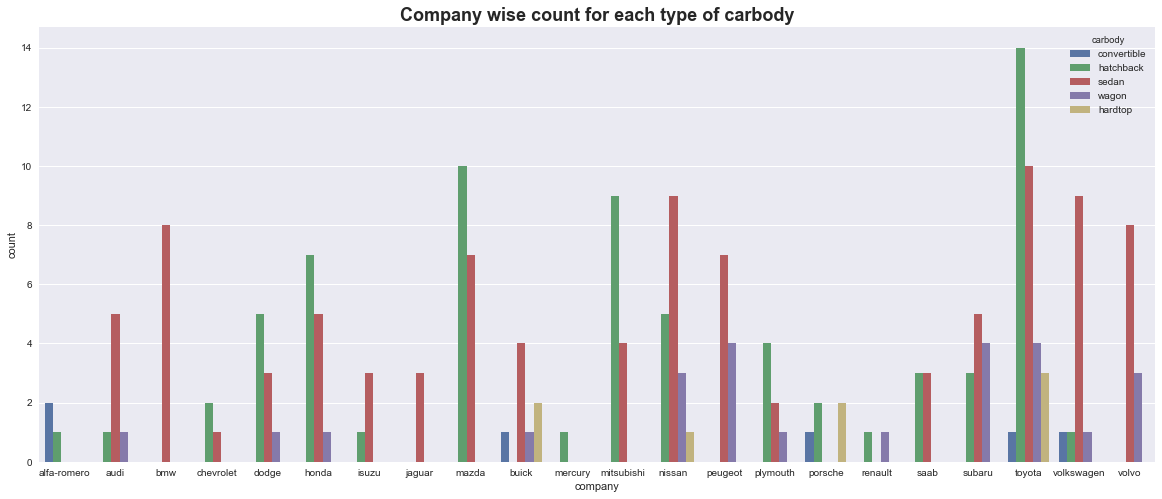

In [382]:
plt.figure(figsize=(20,8))
sns.countplot(data = car, x = 'company',hue='carbody')
plt.title('Company wise count for each type of carbody',fontsize=18,weight="bold")
plt.show()

##### Company/Engine Size vs ['price','carwidth','horsepower','citympg', 'highwaympg']

In [383]:
crosstab = car.groupby(by=['company','enginesize'])['price','carwidth','horsepower','citympg', 'highwaympg'].mean().transpose()
crosstab

company    alfa-romero                audi                           bmw  \
enginesize         130       152       109       131       136       108   
price        14997.500 16500.000 13950.000 20867.084 17332.500 16677.500   
carwidth        64.100    65.500    66.200    69.650    68.875    64.800   
horsepower     111.000   154.000   102.000   150.000   111.250   101.000   
citympg         21.000    19.000    24.000    16.500    18.750    23.000   
highwaympg      27.000    26.000    30.000    21.000    24.250    29.000   

company                            buick                                \
enginesize       164       209       183       234       304       308   
price      22213.333 36318.333 28394.000 34620.000 45400.000 40960.000   
carwidth      65.500    68.567    70.650    71.100    72.000    71.700   
horsepower   121.000   182.000   123.000   155.000   184.000   184.000   
citympg       20.667    15.667    22.000    16.000    14.000    14.000   
highwaympg    27.000    21.333    25.000    18.000    16.000    16.000   

company    chevrolet             dodge                                honda  \
enginesize       61       90       90       98       122       156      79    
price       5151.000 6435.000 6495.800 8257.500 8921.000 12964.000 5399.000   
carwidth      60.300   63.600   63.800   63.800   64.600    66.300   64.000   
horsepower    48.000   70.000   68.000  102.000   88.000   145.000   60.000   
citympg       47.000   38.000   32.200   24.000   24.000    19.000   38.000   
highwaympg    53.000   43.000   38.600   30.000   30.000    24.000   42.000   

company                         isuzu                       jaguar            \
enginesize      92       110      90       111       119       258       326   
price      6930.333 9903.333 8916.500 6785.000 11048.000 33900.000 36000.000   
carwidth     63.950   64.883   63.600   61.800    65.200    69.600    70.600   
horsepower   73.000   90.833   70.000   78.000    90.000   176.000   262.000   
citympg      33.333   26.167   38.000   24.000    24.000    15.000    13.000   
highwaympg   38.000   31.833   43.000   29.000    29.000    19.000    17.000   

company        mazda                                                   \
enginesize       70        80       91        122       134       140   
price      12145.000 15645.000 6435.000 10036.667 18344.000 18280.000   
carwidth      65.700    65.700   64.200    66.500    66.100    66.100   
horsepower   101.000   135.000   68.000    80.667    72.000   120.000   
citympg       17.000    16.000   30.800    27.667    31.000    19.000   
highwaympg    23.000    23.000   36.600    33.667    39.000    27.000   

company      mercury mitsubishi                                        nissan  \
enginesize       140        92       98       110      122       156      97    
price      16503.000   6082.333 7689.000 9505.667 7892.333 13995.667 7243.444   
carwidth      68.000     64.400   63.800   65.400   65.400    66.300   63.800   
horsepower   175.000     68.000  102.000  116.000   88.000   145.000   69.000   
citympg       19.000     33.000   24.000   23.000   25.000    19.000   31.000   
highwaympg    24.000     39.000   30.000   30.000   32.000    24.000   37.000   

company                                  peugeot                     plymouth  \
enginesize      103      120       181       120       134       152      90    
price      7099.000 9249.000 16115.667 14649.000 18150.000 15797.000 6164.333   
carwidth     63.800   65.200    67.200    68.400    68.300    68.400   63.800   
horsepower   55.000   97.000   162.667    96.200   142.000    95.000   68.000   
citympg      45.000   27.000    18.000    19.000    18.000    26.800   33.000   
highwaympg   50.000   34.000    23.667    24.000    24.000    29.800   39.000   

company                                  porsche                      renault  \
enginesize      98       122       156       151       194       203      132   
price      7783.000 892

<a id='cat'></a>

## VI. Convert Categorical Variables to Continuos

In [384]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.nunique()

fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
company           22
dtype: int64

In [385]:
# first convert categorical columns where there are only two distinct values to numeric(0 or 1)
car['fueltype'] = car['fueltype'].map({'gas':0, 'diesel':1})
car['aspiration'] = car['aspiration'].map({'std':0, 'turbo':1})
car['doornumber'] = car['doornumber'].map({'two':0, 'four':1})
car['enginelocation'] = car['enginelocation'].map({'front':0, 'rear':1})

In [386]:
def add_dummy(df,colname):
    """
    This function will convert the categorical column to continuos by adding dummy variables to the dataframe and 
    drop the original categorical column.
    df      :: dataframe
    colname :: name of categorical column
    """
    df_new = df.copy()
    dummy = pd.get_dummies(df_new[colname],drop_first=True)
    df_new = pd.concat([df_new,dummy],axis=1)
    df_new.drop(labels=colname,axis=1,inplace=True)
    print(colname,':::',dummy.columns.values,'\n')
    del dummy
    return df_new

In [387]:
car = add_dummy(car,'carbody')
car = add_dummy(car,'drivewheel')
car = add_dummy(car,'enginetype')
car = add_dummy(car,'fuelsystem')
car = add_dummy(car,'company')
car = add_dummy(car,'cylindernumber')

carbody ::: ['hardtop' 'hatchback' 'sedan' 'wagon'] 

drivewheel ::: ['fwd' 'rwd'] 

enginetype ::: ['dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor'] 

fuelsystem ::: ['2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi'] 

company ::: ['audi' 'bmw' 'buick' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche' 'renault'
 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo'] 

cylindernumber ::: ['five' 'four' 'six' 'three' 'twelve' 'two'] 



<a id='scaling'></a>

## VII. Feature Scaling

In [388]:
car=(car-car.min())/(car.max()-car.min())

<a id='feature'></a>

## VIII. Feature Selection

In [389]:
# Putting feature variable to X(remove car_ID & price)
X = car.loc[:, ~car.columns.isin(['car_ID','price'])]

# Putting target variable to y
y = car['price']

In [390]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , random_state=100)

In [391]:
regression = LinearRegression()

In [392]:
#rank all features
from sklearn.feature_selection import RFE
rfe = RFE(regression, n_features_to_select=1)
rfe.fit(X_train,y_train)

print ("Features sorted by their rank::::\n")
feature_ranking = sorted(list(zip(rfe.ranking_,X_train.columns)))
print(feature_ranking)

Features sorted by their rank::::

[(1, 'enginesize'), (2, 'curbweight'), (3, 'enginelocation'), (4, 'carwidth'), (5, 'bmw'), (6, 'three'), (7, 'rotor'), (8, 'porsche'), (9, 'boreratio'), (10, 'twelve'), (11, 'stroke'), (12, 'two'), (13, 'four'), (14, 'five'), (15, 'peugeot'), (16, 'l'), (17, 'mitsubishi'), (18, 'wheelbase'), (19, 'aspiration'), (20, 'peakrpm'), (21, 'dohcv'), (22, 'horsepower'), (23, 'saab'), (24, 'carheight'), (25, 'plymouth'), (26, 'dodge'), (27, 'fueltype'), (28, 'idi'), (29, 'compressionratio'), (30, 'volvo'), (31, 'ohcf'), (32, 'honda'), (33, 'six'), (34, 'buick'), (35, 'audi'), (36, 'renault'), (37, 'highwaympg'), (38, 'citympg'), (39, 'carlength'), (40, 'jaguar'), (41, 'ohcv'), (42, 'subaru'), (43, 'chevrolet'), (44, '2bbl'), (45, 'doornumber'), (46, 'mpfi'), (47, 'rwd'), (48, 'toyota'), (49, 'isuzu'), (50, '4bbl'), (51, 'ohc'), (52, 'spdi'), (53, 'sedan'), (54, 'symboling'), (55, 'spfi'), (56, 'mfi'), (57, 'mercury'), (58, 'hatchback'), (59, 'wagon'), (60, 'fw

In [393]:
# There are 64 features, we will select top 25 features from it and then mannualy do the backward elimination based on its
# p-value & VIF

In [394]:
top_features = [x[1] for x in feature_ranking[0:30]]
X_train = X_train[top_features]
vif_data = car[top_features]
X_test = X_test[top_features]
X_train.head()

,enginesize,curbweight,enginelocation,carwidth,bmw,three,rotor,porsche,boreratio,twelve,stroke,two,four,five,peugeot,l,mitsubishi,wheelbase,aspiration,peakrpm,dohcv,horsepower,saab,carheight,plymouth,dodge,fueltype,idi,compressionratio,volvo
122,0.140,0.273,0.000,0.292,0.000,0.000,0.000,0.000,0.307,0.000,0.552,0.000,1.000,0.000,0.000,0.000,0.000,0.207,0.000,0.551,0.000,0.083,0.000,0.250,1.000,0.000,0.000,0.000,0.150,0.000
125,0.340,0.500,0.000,0.667,0.000,0.000,0.000,1.000,1.000,0.000,0.495,0.000,1.000,0.000,0.000,0.000,0.000,0.230,0.000,0.551,0.000,0.396,0.000,0.200,0.000,0.000,0.000,0.000,0.156,0.000
166,0.140,0.315,0.000,0.308,0.000,0.000,0.000,0.000,0.500,0.000,0.481,0.000,1.000,0.000,0.000,0.000,0.000,0.230,0.000,1.000,0.000,0.267,0.000,0.400,0.000,0.000,0.000,0.000,0.150,0.000
1,0.260,0.411,0.000,0.317,0.000,0.000,0.000,0.000,0.664,0.000,0.290,0.000,1.000,0.000,0.000,0.000,0.000,0.058,0.000,0.347,0.000,0.263,0.000,0.083,0.000,0.000,0.000,0.000,0.125,0.000
199,0.260,0.647,0.000,0.575,0.000,0.000,0.000,0.000,0.771,0.000,0.514,0.000,1.000,0.000,0.000,0.000,0.000,0.516,1.000,0.388,0.000,0.475,0.000,0.808,0.000,0.000,0.000,0.000,0.031,1.000


In [395]:
import statsmodels.api as sm          # Importing statsmodels
import statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
X_test = sm.add_constant(X_test)
# create a first fitted model

In [396]:
# UDF for calculating vif value
def vif_cal(vif_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=vif_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [397]:
# Significance(p-value) is more important than multicollinearity(VIF value).
#So we will remove those features(one by one) which are having low significance(p-value > significant level).For multicollinearity
#we will check for VIF value & parallely check for it's p-value , if it is greater than significant level we
#will remove that column and if p-value < significant level, we will keep that column.

In [398]:
def feature_to_drop(model,SF=0.05,VF=2):
    pvalue = model.pvalues[model.pvalues >= SF]
    pvalue = pd.DataFrame(pvalue,columns=['pvalue']).sort_values(by='pvalue',ascending=False)
  
    if pvalue.index[0] == 'const':
        pvalue = pvalue.drop(pvalue.head(1).index)
    vif = vif_cal(vif_data).set_index('Var')
    matrix =pd.concat([pvalue,vif[vif.index.isin(pvalue.index)]['Vif']],axis=1)
    matrix = matrix[matrix.Vif >=VF]
    matrix = matrix.sort_values(by='pvalue',ascending=False)
    if(len(matrix)>0):
        feature = matrix[0:1]
        return feature
    else:
        return 'No feature to drop'

In [399]:
# Create new dataframe model_summary that will contain important information for each model.
model_summary = pd.DataFrame(columns=['Model','No_Features','R-squared','Adj_R-squared','Column_to_Drop','p-value','VIF'])
model_summary = model_summary.set_index('Model')

In [400]:
col = feature_to_drop(model1)
col

,pvalue,Vif
dohcv,0.137,2.660


In [401]:
def add_model_summary(model,name):
    col = feature_to_drop(model)
    if type(col)=='str':
        model_summary.loc[name] = [X_train.shape[1],model.rsquared,model.rsquared_adj,'Nothing to Drop',np.NaN,np.NaN]
    else:
        model_summary.loc[name] = [X_train.shape[1],model.rsquared,model.rsquared_adj,col.index[0],col.pvalue[0],col.Vif[0]]
    display(model_summary)

#### Model 1

In [402]:
#Let's see the summary of our first linear model
model1 = sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.44e-69
Time:                        10:33:02   Log-Likelihood:                 266.34
No. Observations:                 143   AIC:                            -476.7
Df Residuals:                     115   BIC:                            -393.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1386      0.055     -2.541      0.012      -0.247      -0.031
enginesize           1.4686      0.149      9.842      0.000       1.173       1.764
curbweight           0.2248      0.076      2.941      0.004       0.073       0.376
enginelocation       0.3030      0.067      4.516      0.000       0.170       0.436
carwidth             0.2007      0.057      3.548      0.001       0.089       0.313
bmw                  0.2729      0.021     12.905      0.000       0.231       0.315
three                0.3108      0.041      7.505      0.000       0.229       0.393
rotor                0.2429      0.030      7.989      0.000       0.183       0.303
porsche              0.1715      0.048      3.557      0.001       0.076       0.267
boreratio           -0.4339      0.052     -8.376      0.000      -0.536      -0.331
twelve              -0.4880      0.099     -4.929      0.000      -0.684      -0.292
stroke              -0.3040      0.041     -7.472      0.000      -0.385      -0.223
two                  0.2429      0.030      7.989      0.000       0.183       0.303
four                 0.2357      0.037      6.408      0.000       0.163       0.309
five                 0.1588      0.032      5.007      0.000       0.096       0.222
peugeot             -0.2035      0.027     -7.631      0.000      -0.256      -0.151
l                    0.1073      0.021      5.025      0.000       0.065       0.150
mitsubishi          -0.0947      0.019     -4.953      0.000      -0.133      -0.057
wheelbase            0.1131      0.059      1.933      0.056      -0.003       0.229
aspiration           0.0638      0.020      3.252      0.002       0.025       0.103
peakrpm              0.0843      0.031      2.744      0.007       0.023       0.145
dohcv                0.1124      0.074      1.521      0.131      -0.034       0.259
horsepower          -0.1078      0.109     -0.991      0.324      -0.323       0.108
saab                 0.0811      0.030      2.709      0.008       0.022       0.140
carheight           -0.0965      0.036     -2.683      0.008      -0.168      -0.025
plymouth            -0.0613      0.025     -2.490      0.014      -0.110      -0.013
dodge               -0.0561      0.021     -2.614      0.010      -0.099      -0.014
fueltype             0.0662      0.079      0.833      0.407      -0.091       0.224
idi                  0.0662      0.079      0.833      0.407      -0.091       0.224
compressionratio    -0.1296      0.184     -0.705      0.482      -0.494       0.235
volvo                0.0541      0.023      2.315      0.022       0.008       0.100
==============================================================================
Omnibus:                       37.078   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.0

In [403]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,15,11,27,26,5,6,14,28,1,0,3,21,8,17,12,10,23,19,7,2,18,13,20,9,29,16,22,4,25,24
Var,l,two,idi,fueltype,three,rotor,peugeot,compressionratio,curbweight,enginesize,carwidth,horsepower,boreratio,wheelbase,four,stroke,carheight,peakrpm,porsche,enginelocation,aspiration,five,dohcv,twelve,volvo,mitsubishi,saab,bmw,dodge,plymouth
Vif,inf,inf,inf,inf,inf,inf,inf,115.470,81.880,67.500,63.540,61.380,45.560,39.180,37.110,27.410,19.920,14.690,5.700,5.070,4.890,3.490,2.660,2.200,1.880,1.670,1.430,1.390,1.330,1.240


In [404]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model1, SF=0.05, VF=2)
drop

,pvalue,Vif
compressionratio,0.482,115.470


In [405]:
# Add key information of this model to model_summary table.
add_model_summary(model = model1, name = 'model1')

,No_Features,R-squared,Adj_R-squared,Column_to_Drop,p-value,VIF
Model,,,,,,
model1,31,0.962,0.953,compressionratio,0.482,115.470


#### Model 2

In [406]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model1).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model1).index[0], axis =1)

In [407]:
model2 = sm.OLS(y_train,X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           2.91e-70
Time:                        10:33:02   Log-Likelihood:                 266.04
No. Observations:                 143   AIC:                            -478.1
Df Residuals:                     116   BIC:                            -398.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1673      0.036     -4.625      0.000      -0.239      -0.096
enginesize         1.4948      0.144     10.366      0.000       1.209       1.780
curbweight         0.2202      0.076      2.897      0.005       0.070       0.371
enginelocation     0.2993      0.067      4.484      0.000       0.167       0.431
carwidth           0.1967      0.056      3.503      0.001       0.085       0.308
bmw                0.2746      0.021     13.100      0.000       0.233       0.316
three              0.3141      0.041      7.652      0.000       0.233       0.395
rotor              0.2482      0.029      8.447      0.000       0.190       0.306
porsche            0.1639      0.047      3.495      0.001       0.071       0.257
boreratio         -0.4365      0.052     -8.468      0.000      -0.539      -0.334
twelve            -0.5270      0.082     -6.434      0.000      -0.689      -0.365
stroke            -0.3043      0.041     -7.495      0.000      -0.385      -0.224
two                0.2482      0.029      8.447      0.000       0.190       0.306
four               0.2441      0.035      7.027      0.000       0.175       0.313
five               0.1676      0.029      5.766      0.000       0.110       0.225
peugeot           -0.2024      0.027     -7.619      0.000      -0.255      -0.150
l                  0.1117      0.020      5.487      0.000       0.071       0.152
mitsubishi        -0.0909      0.018     -4.968      0.000      -0.127      -0.055
wheelbase          0.1085      0.058      1.870      0.064      -0.006       0.223
aspiration         0.0700      0.018      3.994      0.000       0.035       0.105
peakrpm            0.0811      0.030      2.674      0.009       0.021       0.141
dohcv              0.1024      0.072      1.415      0.160      -0.041       0.246
horsepower        -0.0875      0.105     -0.836      0.405      -0.295       0.120
saab               0.0738      0.028      2.632      0.010       0.018       0.129
carheight         -0.0898      0.035     -2.595      0.011      -0.158      -0.021
plymouth          -0.0597      0.024     -2.440      0.016      -0.108      -0.011
dodge             -0.0539      0.021     -2.546      0.012      -0.096      -0.012
fueltype           0.0107      0.011      1.007      0.316      -0.010       0.032
idi                0.0107      0.011      1.007      0.316      -0.010       0.032
volvo              0.0501      0.023      2.215      0.029       0.005       0.095
==============================================================================
Omnibus:                       39.201   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.097
Skew:                           0.894   Prob(JB):                     1.04e-35
Kurtosis:                   

In [408]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,14,11,27,26,15,5,6,1,0,21,3,8,17,12,10,23,19,7,2,18,13,20,9,28,16,22,4,25,24
Var,peugeot,two,idi,fueltype,l,three,rotor,curbweight,enginesize,horsepower,carwidth,boreratio,wheelbase,four,stroke,carheight,peakrpm,porsche,enginelocation,aspiration,five,dohcv,twelve,volvo,mitsubishi,saab,bmw,dodge,plymouth
Vif,inf,inf,inf,inf,inf,inf,inf,81.560,67.170,60.750,58.910,45.500,39.050,36.140,27.120,19.780,12.790,5.700,4.950,4.110,3.390,2.630,1.900,1.880,1.580,1.430,1.390,1.330,1.230


In [409]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model2, SF=0.05, VF=2)
drop

,pvalue,Vif
horsepower,0.405,60.750


In [410]:
# Add key information of this model to model_summary table.
add_model_summary(model = model2, name = 'model2')

,No_Features,R-squared,Adj_R-squared,Column_to_Drop,p-value,VIF
Model,,,,,,
model1,31,0.962,0.953,compressionratio,0.482,115.470
model2,30,0.962,0.953,horsepower,0.405,60.750


#### Model 3

In [411]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model2).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model2).index[0], axis =1)

In [412]:
model3 = sm.OLS(y_train,X_train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           3.74e-71
Time:                        10:33:03   Log-Likelihood:                 265.61
No. Observations:                 143   AIC:                            -479.2
Df Residuals:                     117   BIC:                            -402.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1749      0.035     -5.002      0.000      -0.244      -0.106
enginesize         1.4852      0.144     10.346      0.000       1.201       1.769
curbweight         0.1961      0.070      2.792      0.006       0.057       0.335
enginelocation     0.2899      0.066      4.412      0.000       0.160       0.420
carwidth           0.1961      0.056      3.498      0.001       0.085       0.307
bmw                0.2735      0.021     13.090      0.000       0.232       0.315
three              0.3237      0.039      8.220      0.000       0.246       0.402
rotor              0.2543      0.028      8.944      0.000       0.198       0.311
porsche            0.1593      0.047      3.425      0.001       0.067       0.251
boreratio         -0.4496      0.049     -9.161      0.000      -0.547      -0.352
twelve            -0.5509      0.077     -7.189      0.000      -0.703      -0.399
stroke            -0.3107      0.040     -7.800      0.000      -0.390      -0.232
two                0.2543      0.028      8.944      0.000       0.198       0.311
four               0.2575      0.031      8.370      0.000       0.197       0.318
five               0.1766      0.027      6.542      0.000       0.123       0.230
peugeot           -0.2067      0.026     -7.946      0.000      -0.258      -0.155
l                  0.1169      0.019      6.039      0.000       0.079       0.155
mitsubishi        -0.0882      0.018     -4.904      0.000      -0.124      -0.053
wheelbase          0.1138      0.058      1.974      0.051      -0.000       0.228
aspiration         0.0606      0.013      4.508      0.000       0.034       0.087
peakrpm            0.0687      0.026      2.599      0.011       0.016       0.121
dohcv              0.0710      0.062      1.149      0.253      -0.051       0.193
saab               0.0675      0.027      2.503      0.014       0.014       0.121
carheight         -0.0815      0.033     -2.461      0.015      -0.147      -0.016
plymouth          -0.0553      0.024     -2.318      0.022      -0.103      -0.008
dodge             -0.0503      0.021     -2.429      0.017      -0.091      -0.009
fueltype           0.0157      0.009      1.820      0.071      -0.001       0.033
idi                0.0157      0.009      1.820      0.071      -0.001       0.033
volvo              0.0520      0.022      2.313      0.022       0.007       0.096
==============================================================================
Omnibus:                       35.349   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.036
Skew:                           0.816   Prob(JB):                     7.84e-30
Kurtosis:                       7.454   Cond. No.                     1.22e+16
================================

In [413]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,14,11,26,25,15,5,6,1,0,3,8,17,12,10,22,19,7,2,13,18,20,27,9,16,4,21,24,23
Var,peugeot,two,idi,fueltype,l,three,rotor,curbweight,enginesize,carwidth,boreratio,wheelbase,four,stroke,carheight,peakrpm,porsche,enginelocation,five,aspiration,dohcv,volvo,twelve,mitsubishi,bmw,saab,dodge,plymouth
Vif,inf,inf,inf,inf,inf,inf,inf,70.050,63.280,58.640,41.590,38.750,30.510,26.550,19.250,9.100,5.670,4.760,3.020,2.300,2.130,1.860,1.720,1.550,1.380,1.330,1.300,1.210


In [414]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model3, SF=0.05, VF=2)
drop

,pvalue,Vif
dohcv,0.253,2.130


In [415]:
# Add key information of this model to model_summary table.
add_model_summary(model = model3, name = 'model3')

,No_Features,R-squared,Adj_R-squared,Column_to_Drop,p-value,VIF
Model,,,,,,
model1,31,0.962,0.953,compressionratio,0.482,115.470
model2,30,0.962,0.953,horsepower,0.405,60.750
model3,29,0.962,0.954,dohcv,0.253,2.130


#### Model 4

In [416]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model3).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model3).index[0], axis =1)

In [417]:
model4 = sm.OLS(y_train,X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           6.40e-72
Time:                        10:33:04   Log-Likelihood:                 264.80
No. Observations:                 143   AIC:                            -479.6
Df Residuals:                     118   BIC:                            -405.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1731      0.035     -4.947      0.000      -0.242      -0.104
enginesize         1.4694      0.143     10.269      0.000       1.186       1.753
curbweight         0.1926      0.070      2.741      0.007       0.053       0.332
enginelocation     0.2556      0.059      4.360      0.000       0.140       0.372
carwidth           0.2070      0.055      3.739      0.000       0.097       0.317
bmw                0.2715      0.021     13.022      0.000       0.230       0.313
three              0.3196      0.039      8.138      0.000       0.242       0.397
rotor              0.2497      0.028      8.859      0.000       0.194       0.306
porsche            0.1898      0.038      4.959      0.000       0.114       0.266
boreratio         -0.4435      0.049     -9.078      0.000      -0.540      -0.347
twelve            -0.5456      0.077     -7.123      0.000      -0.697      -0.394
stroke            -0.3087      0.040     -7.747      0.000      -0.388      -0.230
two                0.2497      0.028      8.859      0.000       0.194       0.306
four               0.2506      0.030      8.295      0.000       0.191       0.310
five               0.1705      0.027      6.433      0.000       0.118       0.223
peugeot           -0.2044      0.026     -7.869      0.000      -0.256      -0.153
l                  0.1152      0.019      5.959      0.000       0.077       0.153
mitsubishi        -0.0869      0.018     -4.834      0.000      -0.122      -0.051
wheelbase          0.1075      0.057      1.872      0.064      -0.006       0.221
aspiration         0.0602      0.013      4.473      0.000       0.034       0.087
peakrpm            0.0701      0.026      2.651      0.009       0.018       0.122
saab               0.0667      0.027      2.472      0.015       0.013       0.120
carheight         -0.0786      0.033     -2.377      0.019      -0.144      -0.013
plymouth          -0.0537      0.024     -2.253      0.026      -0.101      -0.007
dodge             -0.0489      0.021     -2.363      0.020      -0.090      -0.008
fueltype           0.0162      0.009      1.871      0.064      -0.001       0.033
idi                0.0162      0.009      1.871      0.064      -0.001       0.033
volvo              0.0504      0.022      2.244      0.027       0.006       0.095
==============================================================================
Omnibus:                       34.638   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.393
Skew:                           0.817   Prob(JB):                     9.74e-28
Kurtosis:                       7.267   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assum

In [418]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,24,11,15,14,25,5,6,1,0,3,8,17,12,10,21,19,7,2,13,18,26,9,16,4,20,23,22
Var,fueltype,two,l,peugeot,idi,three,rotor,curbweight,enginesize,carwidth,boreratio,wheelbase,four,stroke,carheight,peakrpm,porsche,enginelocation,five,aspiration,volvo,twelve,mitsubishi,bmw,saab,dodge,plymouth
Vif,inf,inf,inf,inf,inf,inf,inf,69.910,62.850,57.180,41.280,38.570,29.510,26.540,19.130,9.060,3.540,3.270,2.930,2.300,1.850,1.720,1.550,1.370,1.330,1.300,1.200


In [419]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model4, SF=0.05, VF=2)
drop

,pvalue,Vif
idi,0.064,inf


In [420]:
# Add key information of this model to model_summary table.
add_model_summary(model = model4, name = 'model4')

,No_Features,R-squared,Adj_R-squared,Column_to_Drop,p-value,VIF
Model,,,,,,
model1,31,0.962,0.953,compressionratio,0.482,115.470
model2,30,0.962,0.953,horsepower,0.405,60.750
model3,29,0.962,0.954,dohcv,0.253,2.130
model4,28,0.961,0.953,idi,0.064,inf


#### Model 5

In [421]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model4).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model4).index[0], axis =1)

In [354]:
model5 = sm.OLS(y_train,X_train).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     136.3
Date:                Sat, 17 Mar 2018   Prob (F-statistic):           4.03e-73
Time:                        10:29:30   Log-Likelihood:                 253.43
No. Observations:                 143   AIC:                            -466.9
Df Residuals:                     123   BIC:                            -407.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2196      0.033     -6.578      0.000      -0.286      -0.153
enginesize         1.3960      0.135     10.357      0.000       1.129       1.663
curbweight         0.2138      0.065      3.303      0.001       0.086       0.342
enginelocation     0.2693      0.060      4.498      0.000       0.151       0.388
carwidth           0.2853      0.050      5.704      0.000       0.186       0.384
bmw                0.2620      0.021     12.420      0.000       0.220       0.304
three              0.3180      0.042      7.657      0.000       0.236       0.400
rotor              0.2441      0.027      9.019      0.000       0.190       0.298
porsche            0.1585      0.037      4.325      0.000       0.086       0.231
boreratio         -0.3942      0.049     -8.063      0.000      -0.491      -0.297
twelve            -0.5046      0.080     -6.334      0.000      -0.662      -0.347
stroke            -0.2818      0.040     -6.969      0.000      -0.362      -0.202
two                0.2441      0.027      9.019      0.000       0.190       0.298
four               0.2320      0.031      7.402      0.000       0.170       0.294
five               0.1485      0.026      5.673      0.000       0.097       0.200
peugeot           -0.2051      0.026     -7.750      0.000      -0.257      -0.153
l                  0.1130      0.020      5.662      0.000       0.073       0.152
mitsubishi        -0.0766      0.017     -4.490      0.000      -0.110      -0.043
aspiration         0.0634      0.013      5.054      0.000       0.039       0.088
peakrpm            0.0577      0.023      2.491      0.014       0.012       0.104
saab               0.0393      0.027      1.435      0.154      -0.015       0.094
plymouth          -0.0292      0.024     -1.236      0.219      -0.076       0.018
==============================================================================
Omnibus:                       34.557   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.460
Skew:                           0.955   Prob(JB):                     1.02e-19
Kurtosis:                       6.321   Cond. No.                     1.43e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [355]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

,15,14,5,6,11,1,0,3,8,12,10,18,7,2,13,17,9,16,4,19,20
Var,l,peugeot,three,rotor,two,curbweight,enginesize,carwidth,boreratio,four,stroke,peakrpm,porsche,enginelocation,five,aspiration,twelve,mitsubishi,bmw,saab,plymouth
Vif,inf,inf,inf,inf,inf,58.410,52.420,43.700,36.530,23.970,23.910,6.310,3.070,2.990,2.470,1.870,1.630,1.240,1.230,1.230,1.120


In [356]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model5, SF=0.05, VF=2)
drop

'No feature to drop'

In [357]:
# Add key information of this model to model_summary table.
add_model_summary(model = model5, name = 'model5')

TypeError: 'builtin_function_or_method' object is not subscriptable

#### Model 6

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model5).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model5).index[0], axis =1)

In [ ]:
model6 = sm.OLS(y_train,X_train).fit()
model6.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model6, SF=0.05, VF=2)
drop

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model6, name = 'model6')

#### Model 7

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model6).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model6).index[0], axis =1)

In [ ]:
model7 = sm.OLS(y_train,X_train).fit()
model7.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Feature to Drop based on p-value and VIF
drop = feature_to_drop(model = model7, SF=0.05, VF=2)
drop

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model7, name = 'model7')

***
***
***

#### Model 8

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model7).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model7).index[0], axis =1)

In [ ]:
model8 = sm.OLS(y_train,X_train).fit()
model8.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model8, name = 'model8')

#### Model 9

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model8).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model8).index[0], axis =1)

In [ ]:
model9 = sm.OLS(y_train,X_train).fit()
model9.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model9, name = 'model9')

#### Model 10

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model9).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model9).index[0], axis =1)

In [ ]:
model10 = sm.OLS(y_train,X_train).fit()
model10.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model10, name = 'model10')

#### Model 11

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model10).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model10).index[0], axis =1)

In [ ]:
model11 = sm.OLS(y_train,X_train).fit()
model11.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model11, name = 'model11')

#### Model 12

In [ ]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(feature_to_drop(model11).index[0], axis =1)
vif_data = vif_data.drop(feature_to_drop(model11).index[0], axis =1)

In [ ]:
model12 = sm.OLS(y_train,X_train).fit()
model12.summary()

In [ ]:
# Calculating Vif value
vif_cal(vif_data).transpose() # used transpose to utilize the space.

In [ ]:
# Add key information of this model to model_summary table.
add_model_summary(model = model12, name = 'model12')

In [ ]:
# Making predictions
X_test = X_test[X_train.columns]
y_pred = model7.predict(X_test)

In [ ]:
# computing rmse and r^2
mse = mean_squared_error(y_test,y_pred)
print(mse)
r_square = r2_score(y_test,y_pred)
print(r_square)

In [ ]:
display(model_summary)

In [ ]:
len(y_pred)
len(y_test)

In [ ]:
for i in range(1,len(y_pred),1):
    print(i)

In [ ]:
#Actual vs Predicted
c = [i for i in range(0,len(y_pred),1)]
fig = plt.figure(figsize=(14,7))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label='Actual')
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label='Predicted')
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label
plt.legend()
plt.show()

In [565]:
# Error terms
c = [i for i in range(0,len(y_pred),1)]
fig = plt.figure(figsize=(14,7))
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label
plt.show()

NameError: name 'media' is not defined